# Design of a FIR filter using the frequency sampling method

Alejandro Weinstein (alejandro.weinstein@gmail.com), 20150313

In [1]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import ifft, ifftshift, fftshift
from numpy import pi, abs, exp
from scipy.signal import freqz
%matplotlib inline

$M$ defines the order of the FIR filter. A larger value of $M$ translates on a better approximation of the desired frequency response. A larger $M$ also means a more complex filter (larger memory footprint and larger execution time), and a larger time delay. 

In [2]:
M = 81

Lets create the vector $\omega_k = \frac{2\pi k}{M}$, $k = 0, 1, \ldots, M-1$ and vector $\omega_{k\_equiv}$ with frecuencias equivalentes a $\omega_k$ en el rango $[-\pi, \pi]$:

In [3]:
omega_c = pi / 2
k = np.arange(M)
omega_k = 2 * pi * k / M
omega_k_equiv = ((omega_k + pi) % (2*pi) ) - pi

Then we create $H_d(\omega_{k\_equiv})$. We multiply by $e^{-j\omega_{k\_equiv}\frac{M-1}{2}}$ to get linear phase.

In [4]:
Hd_fun = lambda omega: (1 + 0.9*(abs(omega) >= omega_c))
Hd =  Hd_fun(omega_k_equiv) * exp(-1j * omega_k_equiv * (M-1) / 2)

We find $h(n)$ by calculating the IDFT of $Hd(\omega_k)$.

In [5]:
h = np.real(ifft(Hd))

We can plot the result to veryfy the design.

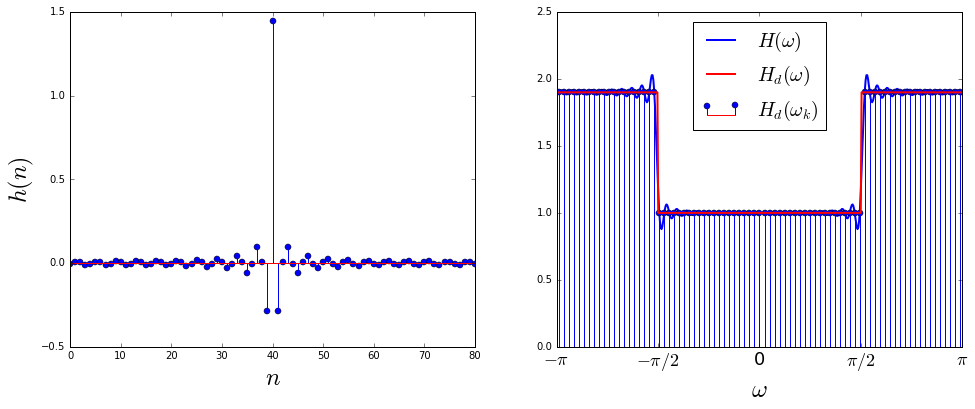

In [6]:
w = np.linspace(-pi, pi, 500)
_, H = freqz(h, 1, w)
_, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].stem(k, h)
axs[0].set_xlim(-0.1, M-0.9)
axs[0].set_xlabel('$n$', fontsize=24)
axs[0].set_ylabel('$h(n)$', fontsize=24)

axs[1].plot(w, abs(H), lw=2)
axs[1].stem(omega_k_equiv, abs(Hd))
#axs[1].plot(w, 1 + (abs(w) >= omega_c), lw=2, c='r')
axs[1].plot(w, Hd_fun(w), lw=2, c='r')
axs[1].set_xlim(-pi, pi)
axs[1].set_xlabel(r'$\omega$', fontsize=24)
axs[1].set_xticks(([-pi, -pi/2, 0, pi/2, pi]))
axs[1].set_xticklabels((r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$'), fontsize=18)
axs[1].legend((r'$H(\omega)$', r'$H_d(\omega)$',r'$H_d(\omega_k)$'), loc='upper center', fontsize=20)

For convinience we save the coefficients in the file `coeffs.txt`.

In [7]:
fn = 'coeffs.txt'
with open(fn, 'w') as f:
    f.write('\n'.join([str(c) for c in h]))